In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("/content/NIFTY50.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5353 non-null   object 
 1   Open       5353 non-null   float64
 2   High       5353 non-null   float64
 3   Low        5353 non-null   float64
 4   Close      5353 non-null   float64
 5   Volume     5353 non-null   int64  
 6   Turnover   5353 non-null   float64
 7   P/E        5353 non-null   float64
 8   P/B        5353 non-null   float64
 9   Div Yield  5353 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 418.3+ KB


In [ ]:
data = pd.read_csv("NIFTY50.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5353 entries, 2000-01-03 to 2021-07-07
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5353 non-null   float64
 1   High       5353 non-null   float64
 2   Low        5353 non-null   float64
 3   Close      5353 non-null   float64
 4   Volume     5353 non-null   int64  
 5   Turnover   5353 non-null   float64
 6   P/E        5353 non-null   float64
 7   P/B        5353 non-null   float64
 8   Div Yield  5353 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 418.2 KB


In [ ]:
df = data.loc["2011-01-01": "2020-12-31", "Close"].to_frame()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [ ]:
df.describe()

,Close
count,2478.000000
mean,8322.986925
std,2321.596658
min,4544.200000
25%,5936.025000
50%,8271.750000
75%,10462.425000
max,13981.950000


<function matplotlib.pyplot.show(*args, **kw)>

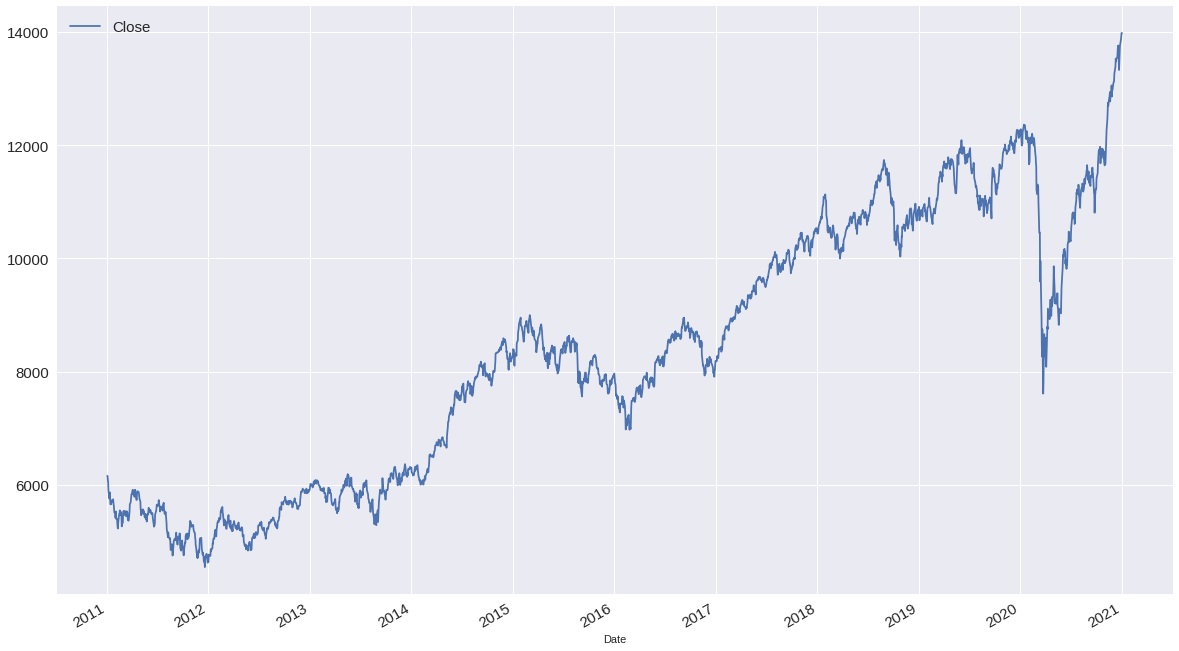

In [ ]:
df.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show

In [ ]:
df["Return"] = df.pct_change()

In [ ]:
df

,Close,Return
Date,,
2011-01-03,6157.60,NaN
2011-01-04,6146.35,-0.001827
2011-01-05,6079.80,-0.010828
2011-01-06,6048.25,-0.005189
2011-01-07,5904.60,-0.023751
...,...,...
2020-12-24,13749.25,0.010893
2020-12-28,13873.20,0.009015
2020-12-29,13932.60,0.004282


In [ ]:
df.dropna(inplace = True) #moves by one row to avoid NaN

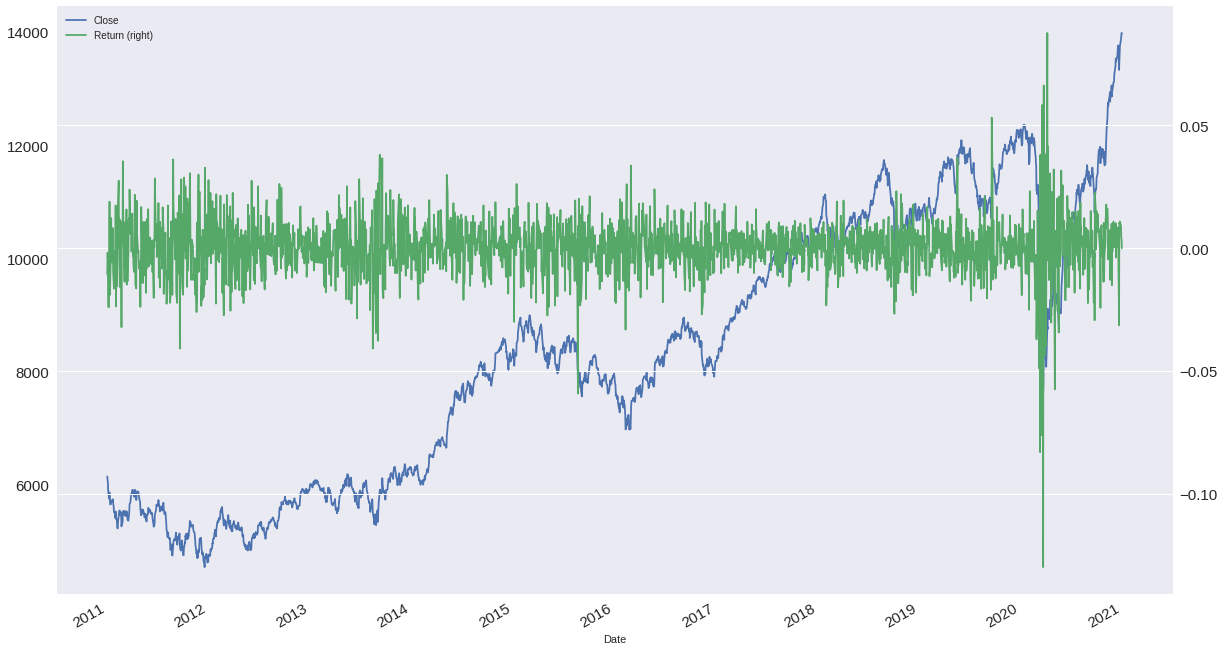

In [ ]:
df.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

Backtesting simple momentum strategy
---
+1 for long

-1 for short

0 for neutral

long tomorrow if today's return was positive

short tomorrow if today's return was negative

In [ ]:
df["Position"] = np.sign(df["Return"])

In [ ]:
df

,Close,Return,Position
Date,,,
2011-01-04,6146.35,-0.001827,-1.0
2011-01-05,6079.80,-0.010828,-1.0
2011-01-06,6048.25,-0.005189,-1.0
2011-01-07,5904.60,-0.023751,-1.0
2011-01-10,5762.85,-0.024007,-1.0
...,...,...,...
2020-12-24,13749.25,0.010893,1.0
2020-12-28,13873.20,0.009015,1.0
2020-12-29,13932.60,0.004282,1.0


In [ ]:
df["simple_momentum_strategy_ret"] = df["Position"].shift() * df["Return"]

In [ ]:
df

,Close,Return,Position,simple_momentum_strategy_ret
Date,,,,
2011-01-04,6146.35,-0.001827,-1.0,NaN
2011-01-05,6079.80,-0.010828,-1.0,0.010828
2011-01-06,6048.25,-0.005189,-1.0,0.005189
2011-01-07,5904.60,-0.023751,-1.0,0.023751
2011-01-10,5762.85,-0.024007,-1.0,0.024007
...,...,...,...,...
2020-12-24,13749.25,0.010893,1.0,0.010893
2020-12-28,13873.20,0.009015,1.0,0.009015
2020-12-29,13932.60,0.004282,1.0,0.004282


In [ ]:
df.simple_momentum_strategy_ret.add(1, fill_value = 0).cumprod()

Date
2011-01-04    1.000000
2011-01-05    1.010828
2011-01-06    1.016073
2011-01-07    1.040205
2011-01-10    1.065177
                ...   
2020-12-24    2.593465
2020-12-28    2.616845
2020-12-29    2.628050
2020-12-30    2.637358
2020-12-31    2.637321
Name: simple_momentum_strategy_ret, Length: 2477, dtype: float64

In [ ]:
df["momentum_strategy"] = df.simple_momentum_strategy_ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

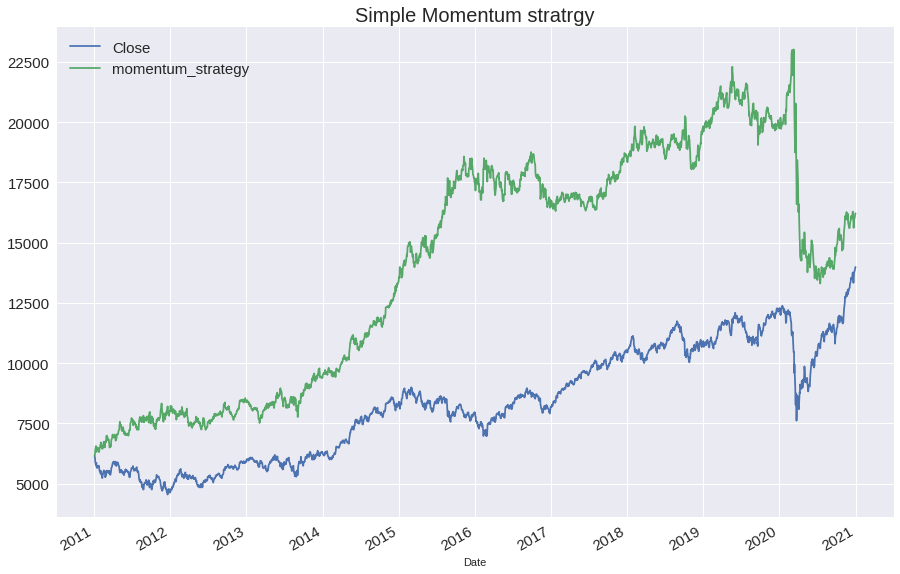

In [ ]:
df[["Close", "momentum_strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum stratrgy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
def summary_ann(returns):
  summary = returns.agg(["mean", "std"]).T
  summary["Return"] = summary["mean"] * 252
  summary["Risk"] = summary["std"] *np.sqrt(252)
  summary.drop(columns = ["mean", "std"], inplace = True)
  return summary

In [ ]:
summary_ann(df[["Return", "momentum_strategy"]])

,Return,Risk
Return,9.892209e-02,0.175404
momentum_strategy,3.547984e+06,76652.413218
